# KNN Principe de base

![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

# Distance euclidien
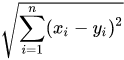

In [ ]:
import math
# Example points in 3-dimensional space...
x = (5, 6, 7)
y = (8, 9, 9)
distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
print("Euclidean distance from x to y: ",distance)

('Euclidean distance from x to y: ', 4.69041575982343)


In [ ]:
import numpy as np

def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print("Distance ",distance([3, 5], [1, 1]))

('Distance ', 4.47213595499958)


# Traitement pour breast_cancer Data 

In [ ]:
# Read data 
import numpy as np
from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
###from sklearn.datasets import load_breast_cancer
breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target
print(breast_cancer_data[0], breast_cancer_data[79], breast_cancer_data[100])
print(breast_cancer_labels[0], breast_cancer_labels[79], breast_cancer_labels[100])
# Create a learnset from the sets above First method 
np.random.seed(42)
indices = np.random.permutation(len(breast_cancer_data))
n_training_samples = 12
learnset_data = breast_cancer_data[indices[:-n_training_samples]]
learnset_labels = breast_cancer_labels[indices[:-n_training_samples]]
testset_data = breast_cancer_data[indices[-n_training_samples:]]
testset_labels = breast_cancer_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]), array([1.286e+01, 1.800e+01, 8.319e+01, 5.063e+02, 9.934e-02, 9.546e-02,
       3.889e-02, 2.315e-02, 1.718e-01, 5.997e-02, 2.655e-01, 1.095e+00,
       1.778e+00, 2.035e+01, 5.293e-03, 1.661e-02, 2.071e-02, 8.179e-03,
       1.748e-02, 2.848e-03, 1.424e+01, 2.482e+01, 9.188e+01, 6.221e+02,
       1.289e-01, 2.141e-01, 1.731e-01, 7.926e-02, 2.779e-01, 7.918e-02]), array([1.361e+01, 2.498e+01, 8.805e+01, 5.827e+02, 9.488e-02, 8.511e-02,
       8.625e-02, 4.489e-02, 1.609e-01, 5.871e-02, 4.565e-01, 1.290e+00,
       2.861e+00, 4.314e+01, 5.872e-03, 1.488e-02, 2.647e-02, 9.921e-03,
       1.465e-02, 2.355e-03, 1.699e+01, 3.527e

In [ ]:
# load breast_cancer dataset
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
breast_cancer = datasets.load_breast_cancer()

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# add target
data['target'] = breast_cancer.target

# split
training, validation = train_test_split(data, test_size=50, stratify=data['target'])

# standardization
training_targets = training.pop('target')
validation_targets = validation.pop('target')

data_mean = training.mean(axis=0)
data_std = training.std(axis=0)
training = (training - data_mean) / data_std
training['target'] = training_targets

validation = (validation - data_mean) / data_std
validation['target'] = validation_targets

print('Training data head')
display(training.head())

Training data head


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
367,-0.544778,-0.305198,-0.562078,-0.562543,-0.269673,-0.599333,-0.554495,-0.730974,-0.399553,-0.504633,-0.579289,-0.801756,-0.522738,-0.513524,-0.420686,-0.639101,-0.391919,-0.758758,-0.148445,-0.681839,-0.407216,-0.269065,-0.397305,-0.447040,0.197275,-0.224715,-0.145457,-0.394866,0.540022,-0.499290,1
311,0.139986,-0.857678,0.032268,0.031950,-1.421600,-1.285740,-0.921343,-0.769547,-0.630064,-1.441455,-0.336595,-0.560630,-0.480402,-0.264706,-0.683881,-1.067806,-0.863868,-0.879696,-0.685510,-1.075423,0.041308,-0.645315,-0.105097,-0.068982,-1.360121,-1.146689,-1.062793,-0.851427,-0.599064,-1.487671,1
479,0.607909,0.048104,0.740355,0.466375,0.465189,1.605234,1.683716,1.112044,1.268904,0.433606,-0.341579,-0.426005,0.110190,-0.163060,0.683288,1.587610,1.563092,1.628787,0.861575,0.942085,0.233532,-0.431723,0.440753,0.103960,0.236538,1.221370,1.503325,0.955594,0.705586,0.428395,0
269,-0.972756,0.256766,-0.926461,-0.889297,0.865114,0.472475,-0.049253,-0.514965,-0.498343,0.836113,-0.322026,0.487156,-0.334342,-0.461256,0.586477,1.213946,1.325108,0.883818,0.807143,1.405799,-0.944617,-0.076832,-0.911709,-0.821601,0.053314,0.015037,-0.088194,-0.429532,-0.474890,0.186172,1
509,0.382507,1.100898,0.492194,0.223108,1.586408,1.562099,1.427109,0.938722,0.010244,1.149332,-0.271033,1.343528,0.039806,-0.177512,0.795195,1.298498,0.900595,1.352990,0.053559,0.810914,0.175658,1.750199,0.310224,0.050976,1.785210,1.539988,1.509951,1.542948,0.200614,1.282579,0


In [ ]:
print("Distance entre deux points d'apprentissage: ",distance(learnset_data[3], learnset_data[44]))

("Distance entre deux points d'apprentissage: ", 64.71217566816082)


Faire changer les features selectionnés



([], <a list of 0 Text yticklabel objects>)

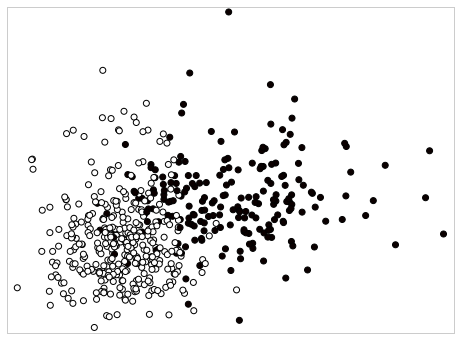

In [ ]:
import matplotlib.pyplot as plt
X = breast_cancer.data[:, :2]  # we only take the first two features.
y = breast_cancer.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.hot, edgecolor='k')


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

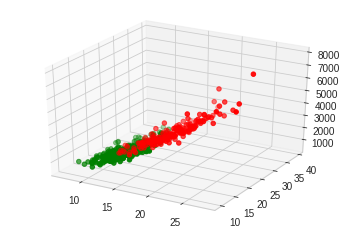

In [ ]:
# Visualize the data of our learnset
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

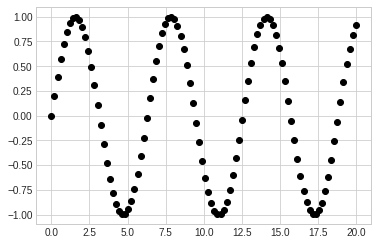

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
import numpy as np
x = np.linspace(0, 20, 100)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');



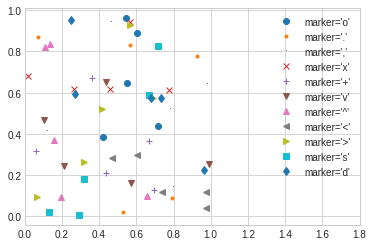

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

# K-Nearest Neighbors

Faire les changements necessaires pour utiliser les données ci-dessus denifies 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3) # 70% training and 30% test
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0]


In [ ]:
prediction = knn.predict(X_test)
print("Prediction: {}".format(prediction))
print("predicted target name: {}".format(breast_cancer['target_names'][prediction]))

Prediction: [0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0]
predicted target name: ['malignant' 'benign' 'benign' 'benign' 'malignant' 'benign' 'malignant'
 'benign' 'benign' 'benign' 'benign' 'malignant' 'malignant' 'malignant'
 'benign' 'malignant' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'benign' 'benign' 'benign' 'benign' 'malignant' 'benign' 'malignant'
 'benign' 'benign' 'malignant' 'malignant' 'malignant' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign' 'benign'
 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'm

In [ ]:
print("Test set accuracy: {:2f}".format(knn.score(X_test, y_test)))
error = 1 - knn.score(X_test, y_test)
print("Erreur: %f" % error)

Test set accuracy: 0.929825
Erreur: 0.070175
